# User Churn Prediction

## Business Goal

In this project, we used supervised learning models to identify what kind of customers are likely to stop using this service in the future. Moreover, we will find primary factors that would influence user retention.

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
%config InlineBackend.figure_format = 'retina'
plt.style.use(style='ggplot')

## Load Data

In [132]:
df = pd.read_csv('/Users/shuangxu/Documents/Data Set/churn.csv')

## Part 1: Data Exploration

### Part 1.1: Understand the Dataset

In [133]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [135]:
print('For this data set:')
print(' Num of rows: ' + str(df.shape[0]))
print(' Num of columns: ' + str(df.shape[1]))
print(' There are no missing valuse in the data set')

For this data set:
 Num of rows: 5000
 Num of columns: 21
 There are no missing valuse in the data set


In [136]:
df.describe(include='all', percentiles=[])

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
count,5000,5000.00000,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,51,NaN,NaN,5000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,418-3129,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,158,NaN,NaN,1,4527,3677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,NaN,100.25860,436.911400,NaN,NaN,NaN,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,NaN
std,NaN,39.69456,42.209182,NaN,NaN,NaN,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,NaN
min,NaN,1.00000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,100.00000,415.000000,NaN,NaN,NaN,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
max,NaN,243.00000,510.000000,NaN,NaN,NaN,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,NaN


In [137]:
df['voice_mail_plan'][0]

' yes'

### Part 1.2: Data cleaning

### Check categorical features

In [138]:
df_categ = df.select_dtypes(exclude=[np.number])
df_categ.head()

,state,phone_number,intl_plan,voice_mail_plan,churned
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


In [139]:
categ_features = ['state','phone_number','intl_plan','voice_mail_plan','churned']
for feature in categ_features:
    print(df[feature][0])

KS
 382-4657
 no
 yes
 False.


We find there are extra whitespace in features like 'state','phone_number','intl_plan','voice_mail_plan','churned'

### Remove extra whitespace in features

In [140]:
# remove the heading and trailing whitespaces for each categorical features
for feature in categ_features:
    df[feature] = df[feature].map(lambda x: x.strip())
    
for feature in categ_features:
    print(df[feature][0])  

KS
382-4657
no
yes
False.


### Part 1.3:  Understand the features

In [141]:
df['churned'].value_counts(dropna=False)

False.    4293
True.      707
Name: churned, dtype: int64

Transform target featur 'churned' into 0 and 1

In [142]:
df['churned'] = np.where(df['churned'] == 'True.', 1, 0)

### Select numeric features

In [143]:
df_num = df.select_dtypes(include=[np.number]).drop(columns = 'area_code')
df_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Correlation 

In [144]:
corr = df_num.corr()
print (corr['churned'].sort_values(ascending=False)[:6],'\n')
print (corr['churned'].sort_values(ascending=False)[-6:])

churned                          1.000000
number_customer_service_calls    0.212564
total_day_minutes                0.207705
total_day_charge                 0.207700
total_eve_minutes                0.089288
total_eve_charge                 0.089282
Name: churned, dtype: float64 

account_length           0.021203
total_day_calls          0.016130
total_eve_calls         -0.006284
total_night_calls       -0.006986
total_intl_calls        -0.046893
number_vmail_messages   -0.097633
Name: churned, dtype: float64


We can see that 'number_customer_service_calls', 'total_day_minutes','total_day_charge' have higher correlation with target feather compared to other features. 

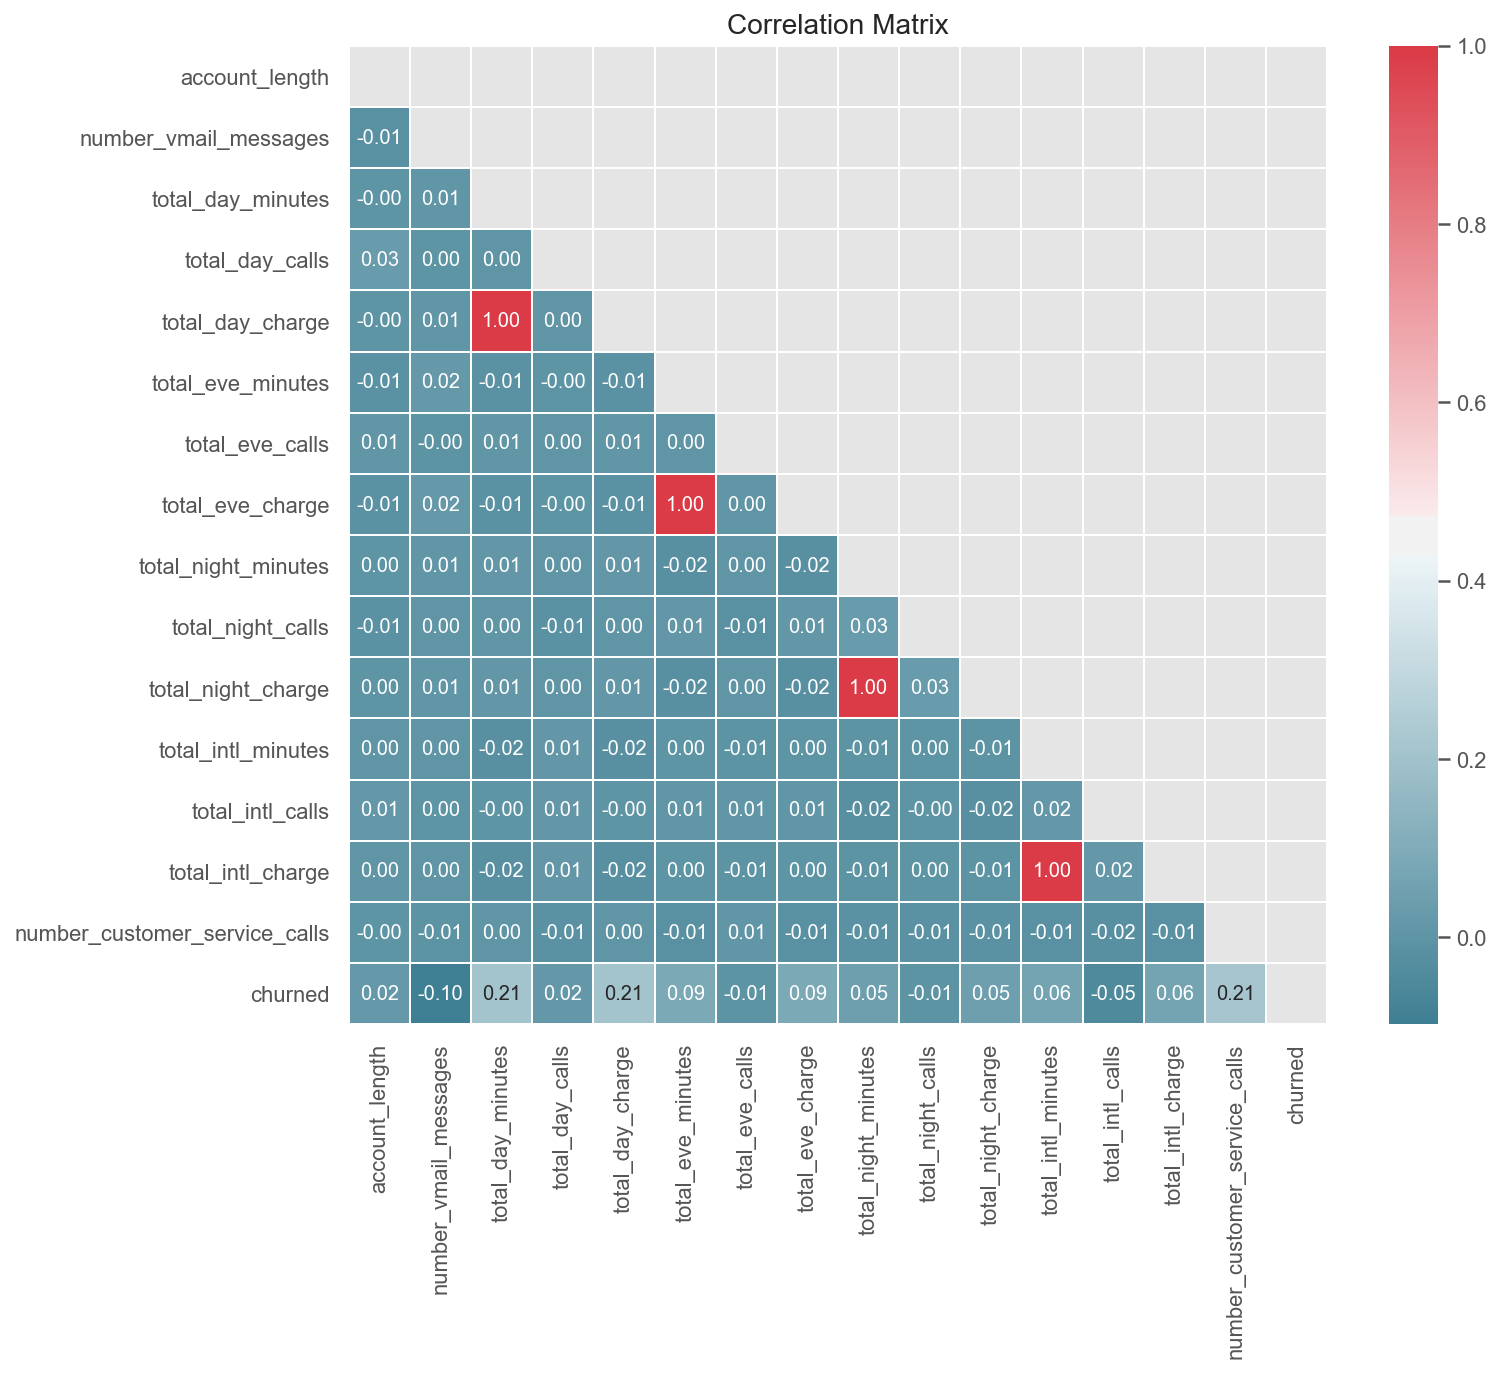

In [145]:
from mlens.visualization import corrmat
corrmat(corr, inflate=False)
plt.show()

In [146]:
from scipy.stats import pearsonr
print (pearsonr(df['total_day_minutes'], df['total_day_charge'])[0])
print (pearsonr(df['total_eve_minutes'], df['total_eve_charge'])[0])
print (pearsonr(df['total_night_minutes'], df['total_night_charge'])[0])
print (pearsonr(df['total_intl_minutes'], df['total_intl_charge'])[0])

0.9999999509831993
0.9999997748632398
0.9999992071867972
0.999992657020837


We find there are very high correlations among charge and minutes features.

### Histogram for each numeric feature

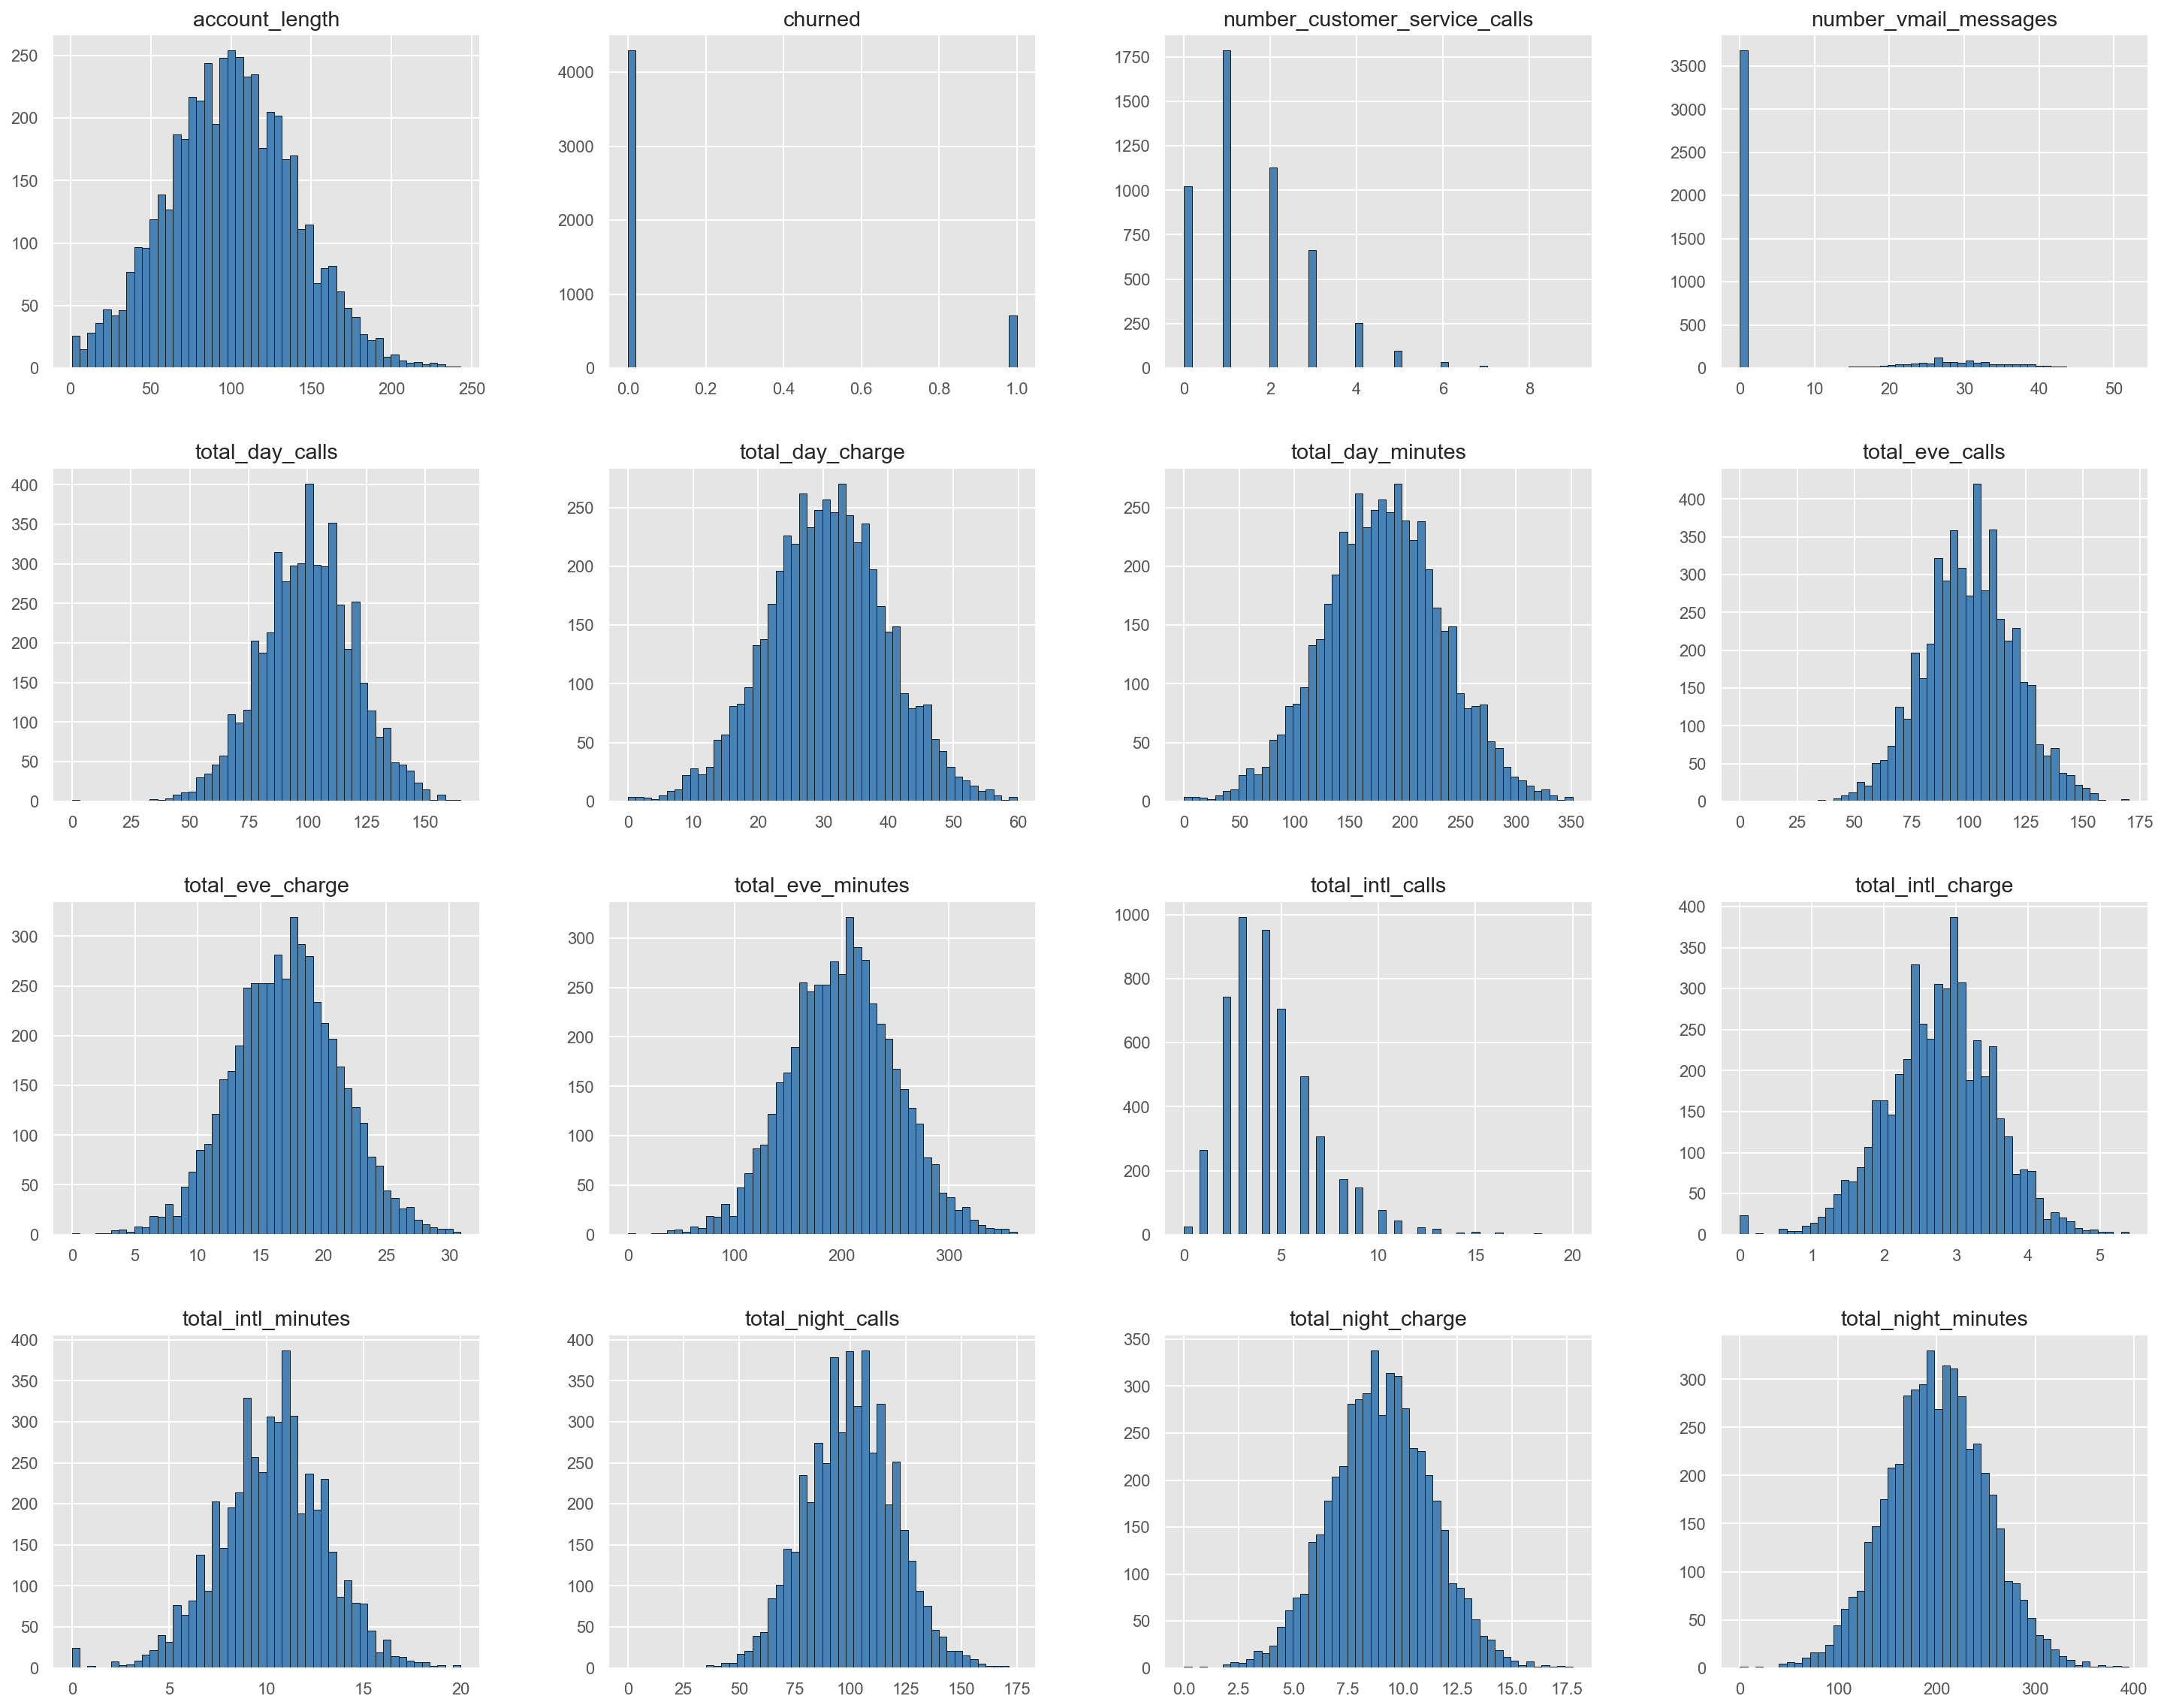

In [147]:
df_num.hist(bins=50, figsize=(25,20),color='steelblue', ec='k')
plt.show()

### Churned rate in each state 

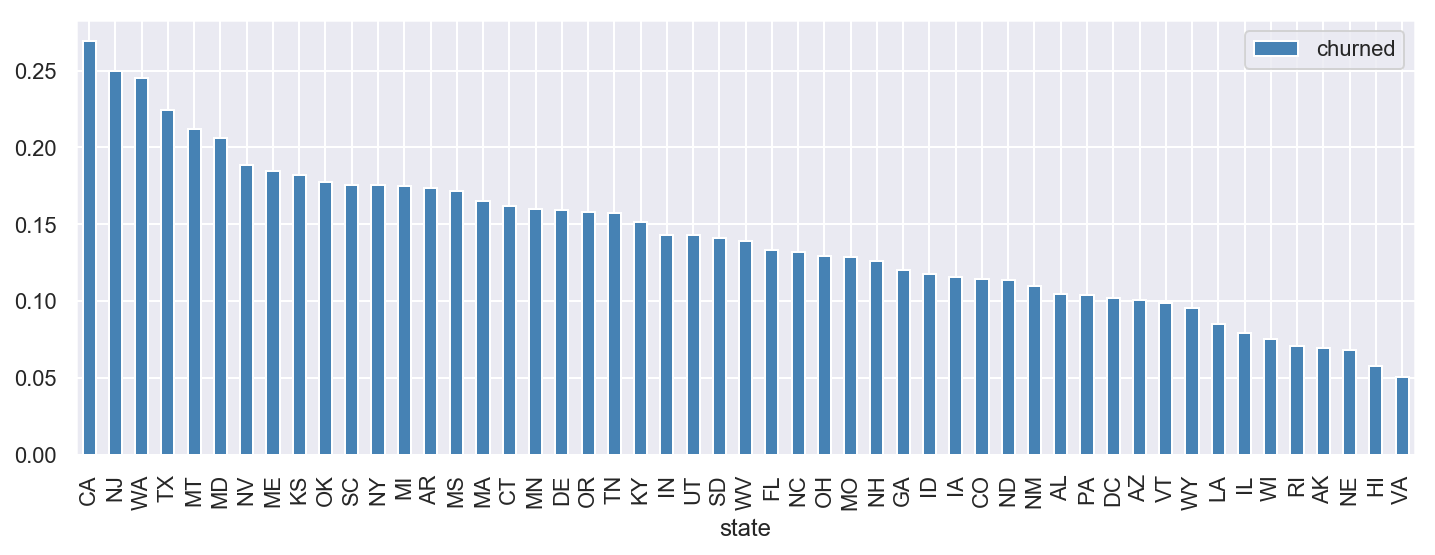

In [148]:
sns.set(rc={'figure.figsize':(12, 4)})

state_pivot = df.pivot_table(index="state",values="churned").sort_values(ascending=False,by=['churned'])
state_pivot.plot.bar(rot=90, color = 'steelblue')
plt.show()

States including CA, NH, WA, TX, MT and MD has over 20% churn rate.

### Intl_plan vs. Churn Rate

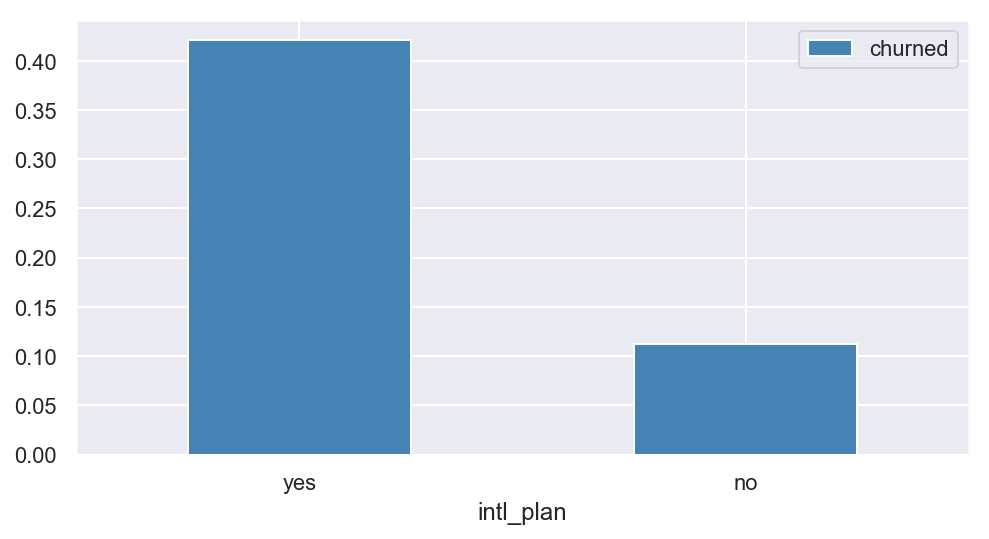

In [149]:
sns.set(rc={'figure.figsize':(8, 4)})

intl_plan_pivot = df.pivot_table(index="intl_plan",values="churned").sort_values(ascending=False,by=['churned'])
intl_plan_pivot.plot.bar(rot=0, color = 'steelblue')
plt.show()

Customers with international plan have 40% churn rate while customers without it have only 10% churn rate. 

### Voice_mail_plan vs. Churn Rate

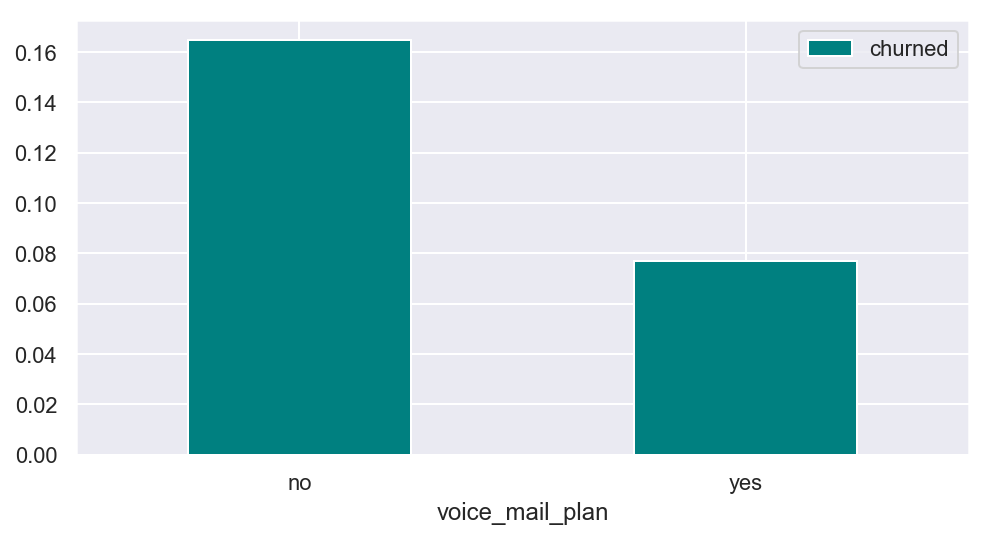

In [150]:
intl_plan_pivot = df.pivot_table(index="voice_mail_plan",values="churned")
intl_plan_pivot.plot.bar(rot=0, color = 'teal')
plt.show()

### Some numeric features vs. Churn rate

<Figure size 576x288 with 0 Axes>

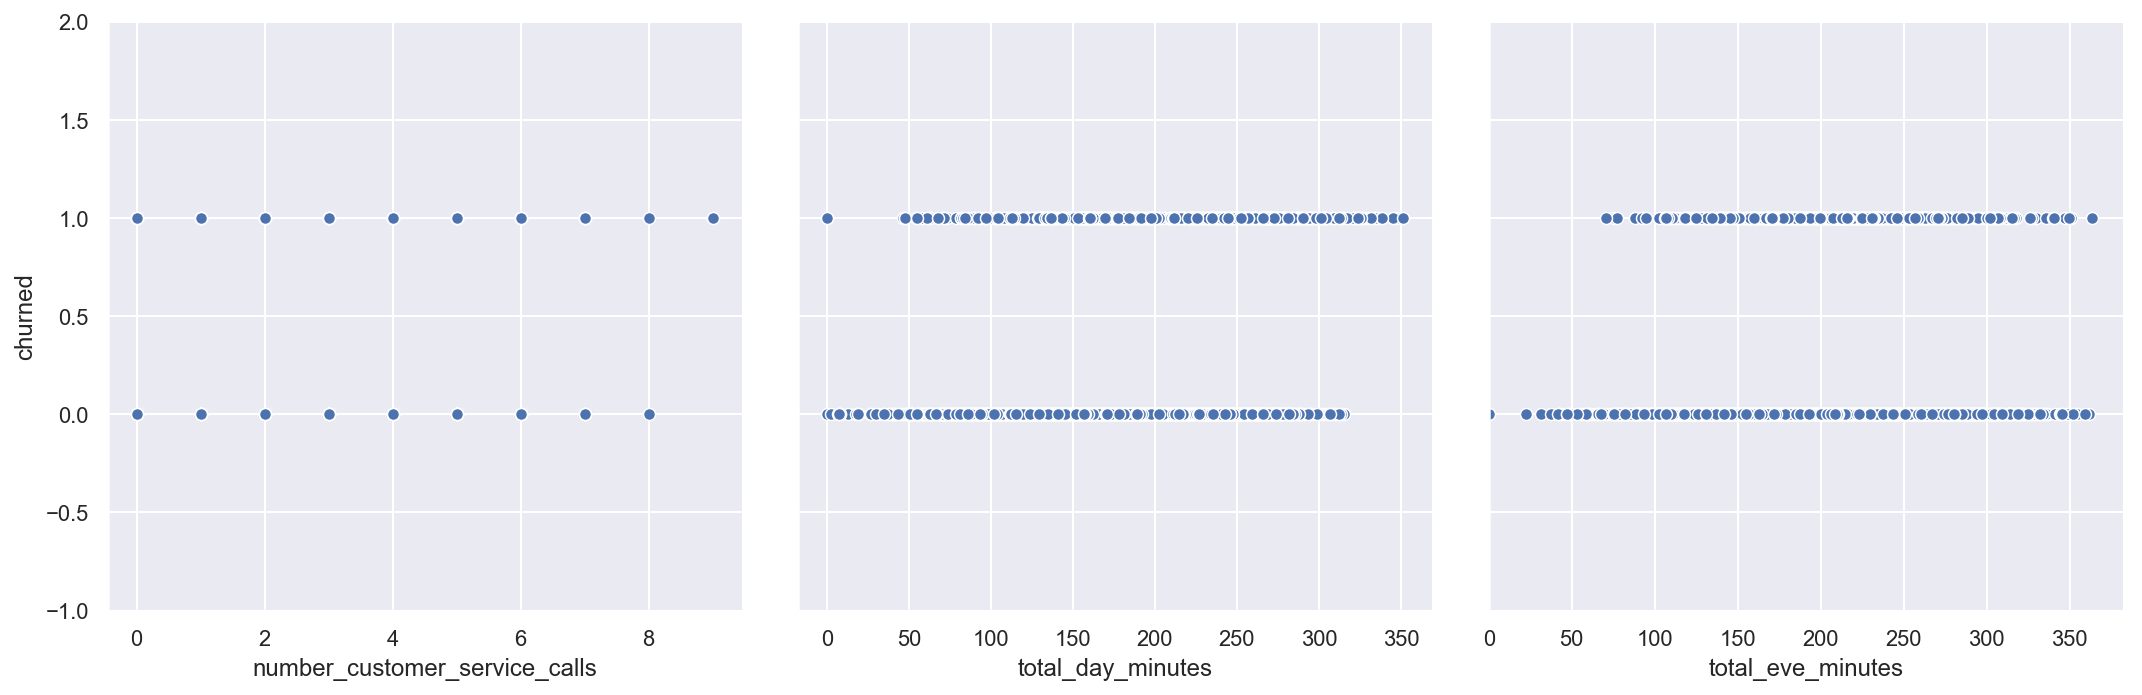

In [151]:
plt.figure()
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(df_num,
             y_vars=['churned'],
             x_vars=['number_customer_service_calls','total_day_minutes','total_eve_minutes'], size = 5)
plt.ylim(-1, 2)
plt.xlim(0, None)
plt.show()

We find customers would stop subscribing the service if their total daily minutes are more than around 320 minutes. 
This may because the company does not offer a competitive price on long time calls. 

## Part 2: Feature Preprocessing

#### Specify the target column. 

In [152]:
y = df['churned']

#### Convert yes and no in categorical feature into boolean values

In [153]:
df[["intl_plan","voice_mail_plan"]] = df[["intl_plan","voice_mail_plan"]] == 'yes'

#### Get dummy variables of state feature and insert them into the feature matrix

In [154]:
df = pd.get_dummies(df, columns=['state'])
df.head()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Drop certain columns 

In [155]:
to_drop = ['area_code','phone_number','churned']
features_for_slection= df.drop(to_drop, axis=1)

In [156]:
features_for_slection.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Scale the data by using standardization

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features_for_slection)

In [34]:
print('Feature dataset X has %d observations and %d features' % X.shape)

Feature dataset X has 5000 observations and 68 features


In [35]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0.698941,-0.323240,1.667120,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,-0.120873,-0.15947,-0.136912,-0.13462,-0.102515,-0.139914,-0.142127,-0.133848,-0.13842,-0.135388,-0.129924,-0.132291,-0.118292,-0.156142,-0.133848,-0.141393,7.035983,-0.142127,-0.129126,-0.145029,-0.144308,-0.145029,-0.145029,-0.160128,-0.137668,-0.142127,-0.142127,-0.136152,-0.133848,-0.133848,-0.139169,-0.151371,-0.136152,-0.135388,-0.152748,-0.154114,-0.135388,-0.152748,-0.125063,-0.142127,-0.136152,-0.131507,-0.13462,-0.154114,-0.151371,-0.155468,-0.143584,-0.141393,-0.147171,-0.180641,-0.153432
1,0.169849,-0.323240,1.667120,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,-0.120873,-0.15947,-0.136912,-0.13462,-0.102515,-0.139914,-0.142127,-0.133848,-0.13842,-0.135388,-0.129924,-0.132291,-0.118292,-0.156142,-0.133848,-0.141393,-0.142127,-0.142127,-0.129126,-0.145029,-0.144308,-0.145029,-0.145029,-0.160128,-0.137668,-0.142127,-0.142127,-0.136152,-0.133848,-0.133848,-0.139169,-0.151371,-0.136152,-0.135388,-0.152748,6.488717,-0.135388,-0.152748,-0.125063,-0.142127,-0.136152,-0.131507,-0.13462,-0.154114,-0.151371,-0.155468,-0.143584,-0.141393,-0.147171,-0.180641,-0.153432
2,0.925695,-0.323240,-0.599837,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,-0.120873,-0.15947,-0.136912,-0.13462,-0.102515,-0.139914,-0.142127,-0.133848,-0.13842,-0.135388,-0.129924,-0.132291,-0.118292,-0.156142,-0.133848,-0.141393,-0.142127,-0.142127,-0.129126,-0.145029,-0.144308,-0.145029,-0.145029,-0.160128,-0.137668,-0.142127,-0.142127,-0.136152,-0.133848,-0.133848,-0.139169,6.606274,-0.136152,-0.135388,-0.152748,-0.154114,-0.135388,-0.152748,-0.125063,-0.142127,-0.136152,-0.131507,-0.13462,-0.154114,-0.151371,-0.155468,-0.143584,-0.141393,-0.147171,-0.180641,-0.153432
3,-0.409634,3.093675,-0.599837,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885,-0.120873,-0.15947,-0.136912,-0.13462,-0.102515,-0.139914,-0.142127,-0.133848,-0.13842,-0.135388,-0.129924,-0.132291,-0.118292,-0.156142,-0.133848,-0.141393,-0.142127,-0.142127,-0.129126,-0.145029,-0.144308,-0.145029,-0.145029,-0.160128,-0.137668,-0.142127,-0.142127,-0.136152,-0.133848,-0.133848,-0.139169,-0.151371,-0.136152,-0.135388,-0.152748,6.488717,-0.135388,-0.152748,-0.125063,-0.142127,-0.136152,-0.131507,-0.13462,-0.154114,-0.151371,-0.155468,-0.143584,-0.141393,-0.147171,-0.180641,-0.153432
4,-0.636388,3.093675,-0.599837,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445,-0.120873,-0.15947,-0.136912,-0.13462,-0.102515,-0.139914,-0.142127,-0.133848,-0.13842,-0.135388,-0.129924,-0.132291,-0.118292,-0.156142,-0.133848,-0.141393,-0.142127,-0.142127,-0.129126,-0.145029,-0.144308,-0.145029,-0.145029,-0.160128,-0.137668,-0.142127,-0.142127,-0.136152,-0.133848,-0.133848,-0.139169,-0.151371,-0.136152,-0.135388,-0.152748,-0.154114,7.386173,-0.152748,-0.125063,-0.142127,-0.136152,-0.131507,-0.13462,-0.154114,-0.151371,-0.155468,-0.143584,-0.141393,-0.147171,-0.180641,-0.153432


## Part 3: Model Training

### Part 3.1: Split dataset

In [36]:
from sklearn import model_selection

# Use 80% for trainingn and hold 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 68 features
test data has 1000 observation with 68 features


### Part 3.2: Model Training and Selection

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# Logistic Regression
Logi = LogisticRegression()

# K Nearest Neighbors
KNN = KNeighborsClassifier()

# Random Forest
RF = RandomForestClassifier()

#### Use 10-fold Cross Validation to get the accuracy for each model

In [61]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [Logi, KNN, RF]

count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print('Model accuracy of %s is: %.3f'%(model_names[count], cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.863
Model accuracy of KNN is: 0.865
Model accuracy of Random Forest is: 0.932


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [52]:
from sklearn.model_selection import GridSearchCV

def grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters for Logistic Regression model 

In [102]:
parameters = {'penalty':('l1', 'l2'), 'C':(1, 5, 10)} # the lambda value(weight) for L1 and L2
    
Grid_Logi = GridSearchCV(LogisticRegression(), parameters, cv=10)
Grid_Logi.fit(X_train, y_train)

# the best hyperparameter combination
grid_search_metrics(Grid_Logi)

Best score: 0.864
Best parameters set:
	C: 1
	penalty: 'l1'


In [104]:
# best model for logsitic regression 
best_Logi_model = Grid_Logi.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [58]:
parameters = {'n_neighbors':[3,5,7,10] } # choose the k 
    
Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
Grid_KNN.fit(X_train, y_train)

grid_search_metrics(Grid_KNN)

Best score: 0.866
Best parameters set:
	n_neighbors: 5


In [59]:
# best model for logsitic regression 
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [60]:
parameters = {'n_estimators' : [40,60,80]}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=10)
Grid_RF.fit(X_train, y_train)

# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.947
Best parameters set:
	n_estimators: 80


In [65]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

## Part 4: Model Evaluation

### Part 4.1: Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier_name, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier_name)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("Precision is: %0.3f" % precision)
    print ("Recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Churn','Churn']
    for cm in confusion_matrices:
        classifier_name, cm = cm[0], cm[1]
        cal_evaluation(classifier_name, cm)
        fig = plt.figure(figsize = (12,6))
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
        plt.title('Confusion Matrix for %s' % classifier_name, weight = 'bold', fontsize = 18) 
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

### Confusion matrix for Logistic Regression, KNN, and Random Forest 

Logistic Regression
Accuracy is: 0.868
Precision is: 0.508
Recall is: 0.233


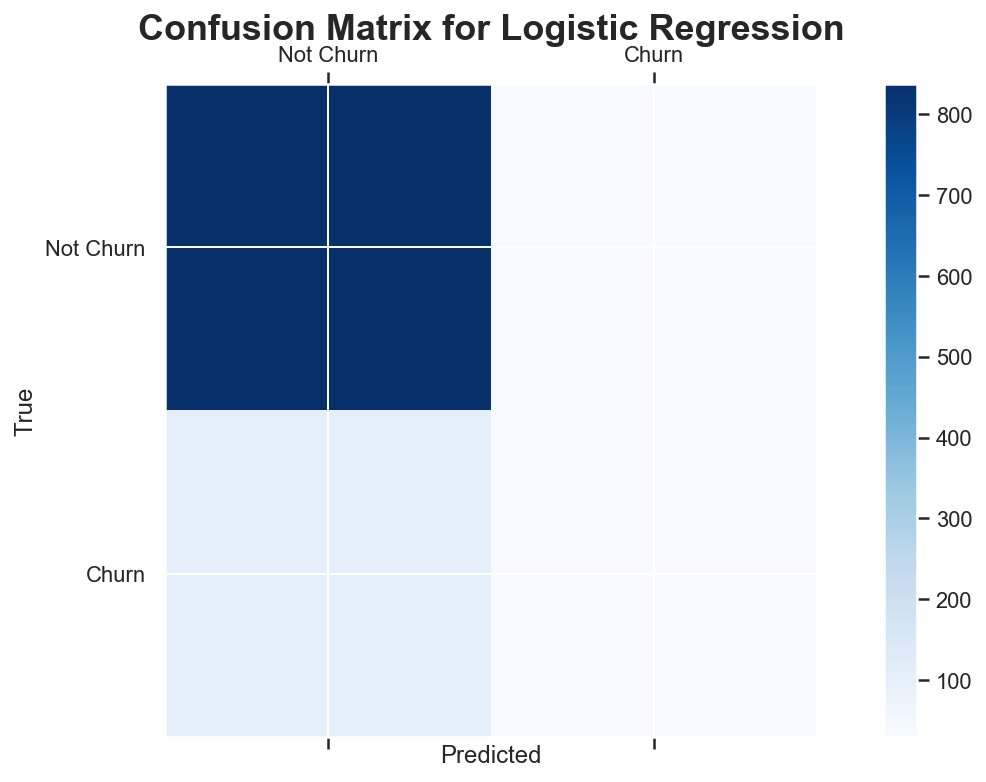

KNN
Accuracy is: 0.862
Precision is: 0.381
Recall is: 0.060


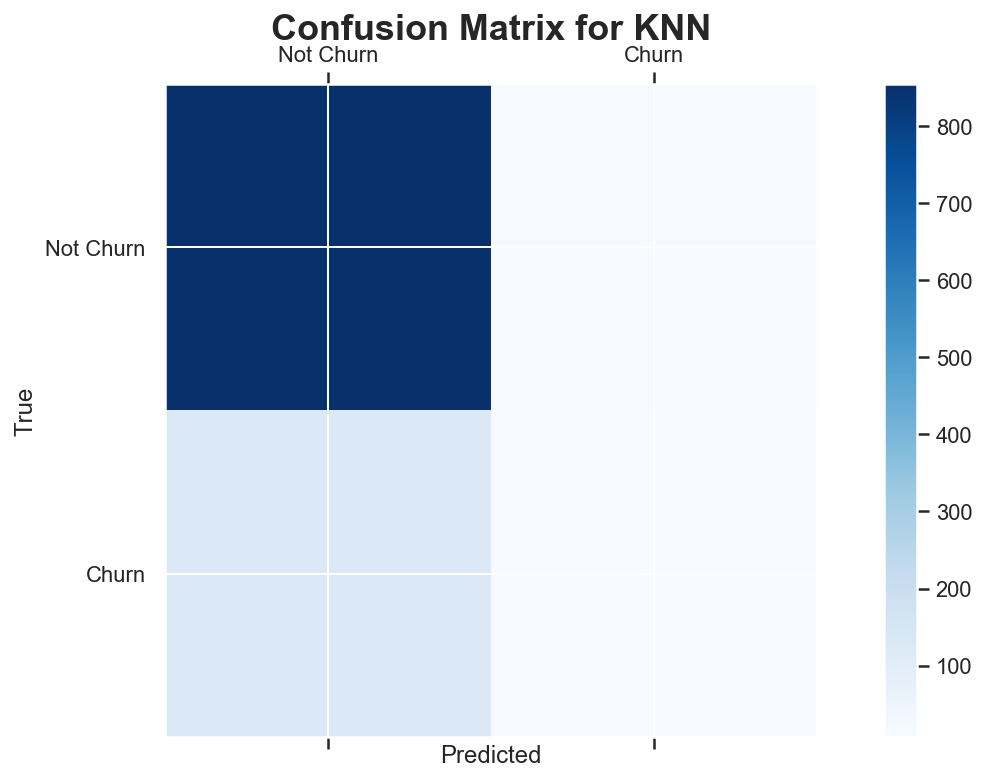

Random Forest
Accuracy is: 0.956
Precision is: 0.949
Recall is: 0.707


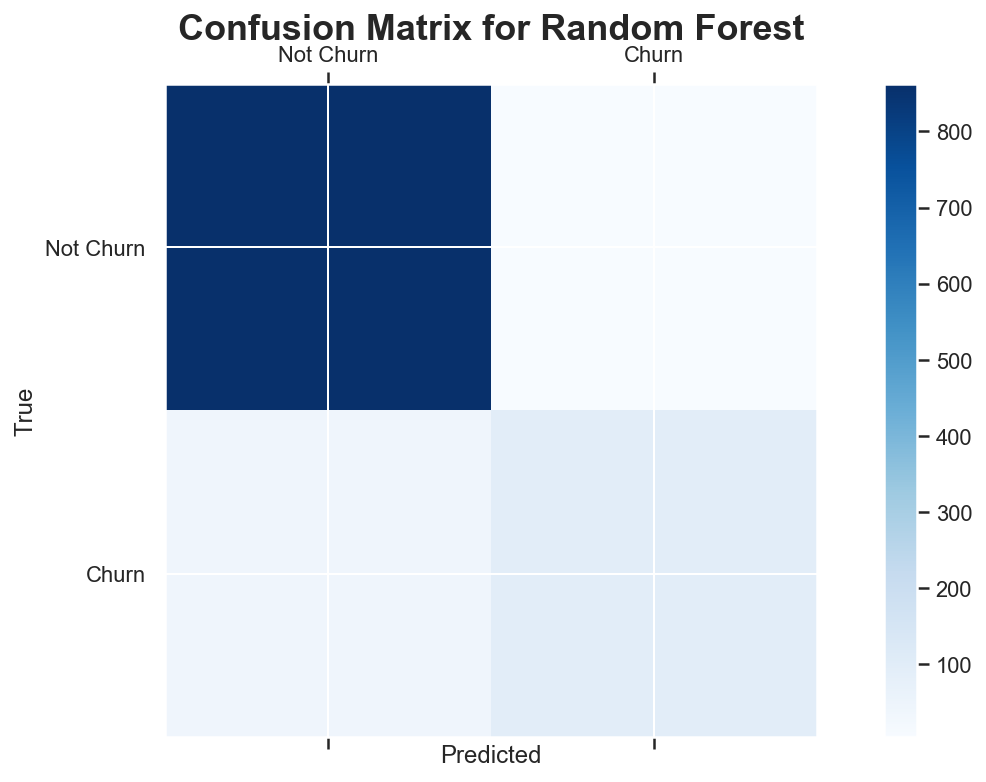

In [113]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test, best_Logi_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test)))]
draw_confusion_matrices(confusion_matrices)

### Part 4.2: ROC & AUC

#### Part 3.4.1: ROC of RF Model

AUC of Logistic Regression Model is: 0.821


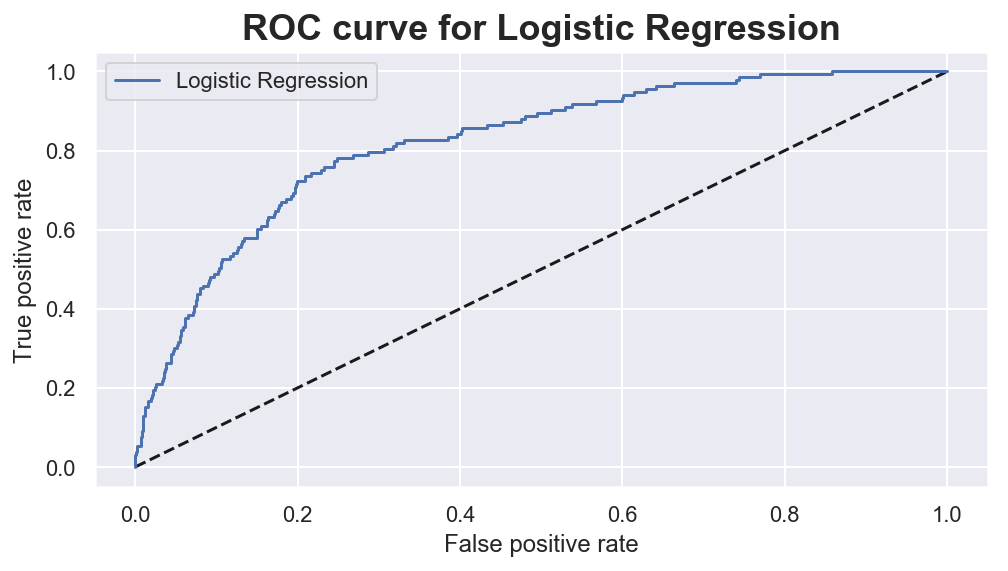

AUC of KNN Model is: 0.685


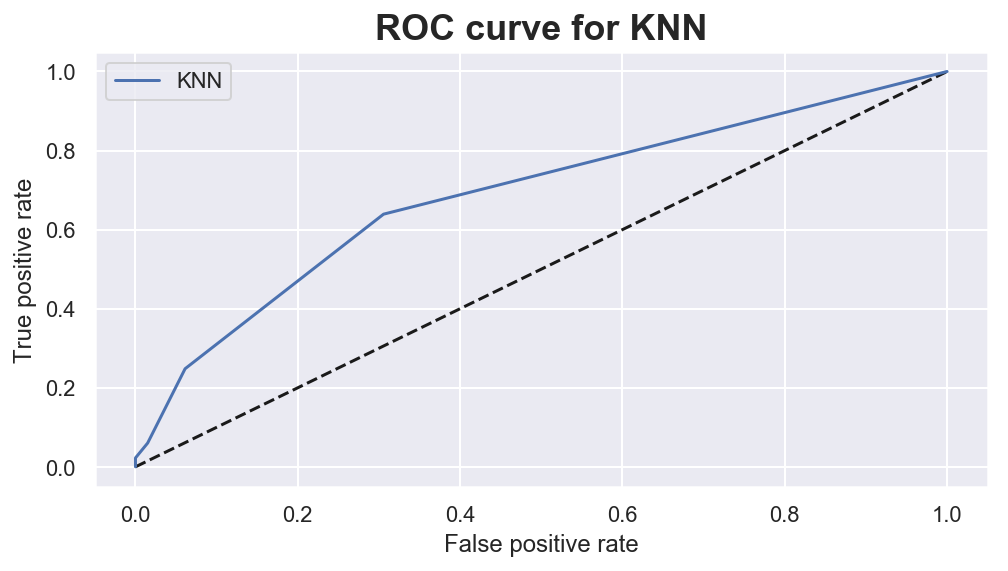

AUC of Random Forest Model is: 0.940


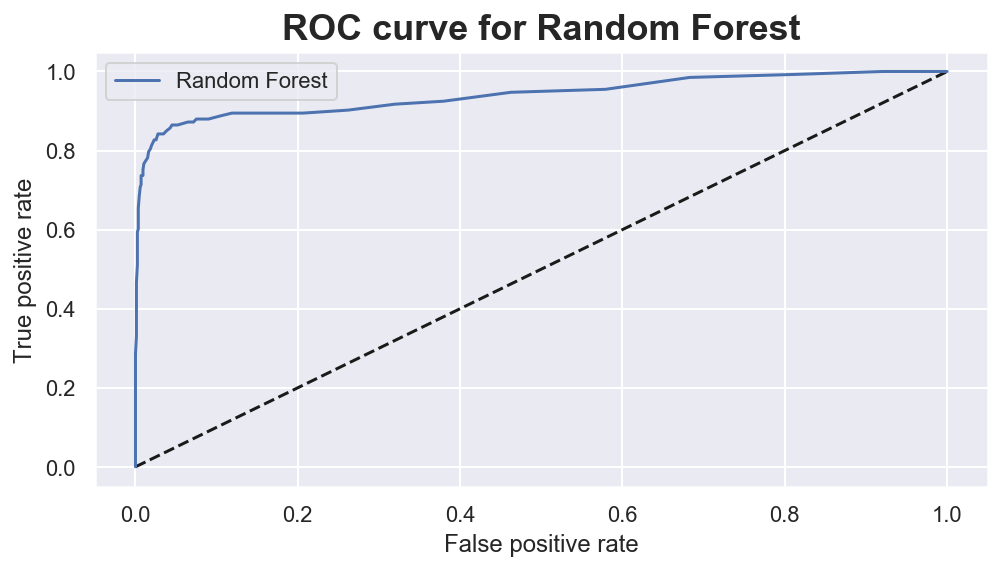

In [127]:
from sklearn.metrics import roc_curve
from sklearn import metrics

best_models = [best_Logi_model,best_KNN_model,best_RF_model]
model_names = ['Logistic Regression','KNN','Random Forest']
count = 0

for best_model in best_models:
    y_pred = best_model.predict_proba(X_test)[:, 1] #Use predict_proba to get the probability results
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    print('AUC of %s Model is: %.3f'%(model_names[count], metrics.auc(fpr, tpr)))
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='%s' %model_names[count])
    plt.legend(loc='best')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for %s' %model_names[count], weight = 'bold', fontsize = 18 )
    plt.show()
    count += 1

## Part 5: Feature Selection

### Part 5.1: Logistic Regression Model - Feature Selection Discussion

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

In [159]:
# add L1 regularization to logistic regression
# check the coef for feature selection
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), features_for_slection.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8718
total_day_minutes: 0.744
number_customer_service_calls: 0.6877
intl_plan: 0.6469
number_vmail_messages: 0.4012
total_eve_minutes: 0.2678
state_VA: -0.1948
total_intl_charge: 0.1756
total_intl_calls: -0.1669
state_RI: -0.1567
total_night_minutes: 0.1528
state_MT: 0.14
state_CA: 0.1189
state_HI: -0.1188
state_WA: 0.1119
state_IL: -0.1059
total_eve_charge: 0.1039
state_VT: -0.1035
state_WY: -0.0961
state_NJ: 0.0941
state_TX: 0.0892
state_NE: -0.0832
state_WI: -0.0817
state_AK: -0.0747
total_intl_minutes: 0.0701
state_SC: 0.0695
account_length: 0.0609
total_day_calls: 0.0583
total_night_charge: 0.0571
state_ND: -0.052
state_CO: -0.0514
state_ME: 0.051
state_MI: 0.0505
state_NY: 0.0481
state_MA: 0.0471
state_AL: -0.0468
total_night_calls: -0.0417
state_NC: -0.0405
state_GA: -0.0386
state_MN: 0.0382
state_AR: 0.0354
state_NV: 0.0335
state_PA: -0.0314
state_KY: 0.0311
state_CT: 0.0309
state_NM: -0.027
total_eve_calls: -0.0248
stat

### Part 5.2: Random Forest Model - Feature Importance Discussion

In [161]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), features_for_slection.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1417
total_day_charge: 0.1178
number_customer_service_calls: 0.1109
intl_plan: 0.0755
total_eve_minutes: 0.0565
total_eve_charge: 0.0563
total_intl_minutes: 0.0453
total_intl_calls: 0.0433
total_intl_charge: 0.0374
total_night_minutes: 0.0356
total_night_charge: 0.0354
account_length: 0.033
total_day_calls: 0.0325
total_eve_calls: 0.0289
total_night_calls: 0.0285
number_vmail_messages: 0.0251
voice_mail_plan: 0.0168
state_NJ: 0.0047
state_TX: 0.0038
state_OK: 0.0025
state_OH: 0.0025
state_WA: 0.0024
state_MD: 0.0024
state_OR: 0.0022
state_MT: 0.0022
state_DC: 0.0022
state_TN: 0.0021
state_CA: 0.0021
state_MS: 0.002
state_MA: 0.002
state_CO: 0.002
state_VT: 0.0019
state_MI: 0.0019
state_AR: 0.0019
state_AL: 0.0019
state_ME: 0.0018
state_IL: 0.0017
state_WY: 0.0016
state_VA: 0.0016
state_SC: 0.0016
state_IN: 0.0016
state_ID: 0.0016
state_NY: 0.0015
state_PA: 0.0014
state_MN: 0.0014
state_UT: 0.0013
state_NE: 0.0013
s

## Part 5: Conclusion